# Gradient Boosting Regression from Scratch

The Gradient Boosting (GB) algorithm trains a series of weak learners and each focuses on the errors the previous learners have made and tries to improve it. Together, they make a better prediction.

According to Wikipedia, Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion as other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function. 

Prerequisite

    1. Linear regression and gradient descent
    2. Decision Tree

After studying this post, you will be able to:

    1. Explain gradient boosting algorithm.
    2. Explain gradient boosting regression algorithm.
    3. Write a gradient boosting regressor from scratch


    
# The algorithm

The following plot illustrates the algorithm.

![Gradient Boosting Regression](gradient_boosting/gradient_boosting_regression.png)

From the plot above, the first part is a stump, which is the average of **y**. We then add several trees to it. In the following trees, the target is not y. Instead, the target is the residual or the true value subtracts the previous prediction.

$$residual=true\_value - previous\_prediction$$

That is why we say in Gradient Boosting trains a series of weak learners, each focuses on the errors of the previous one. The residual predictions are multiplied by the learning rate (0.1 here) before added to the average.

---

**The Steps**

Step 1: Calculate the average of y. The average is also the first estimation of y:
$$\bar{y}=\frac{1}{n} \sum_{i=1}^{n}y_i$$

$$F_0(x)=\bar{y}$$
Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=y_i-F_{m-1}(x_i)$$
  * Step 2.2: Fit a regression tree $t_m(x)$ to pseudo-residuals and create terminal regions (leafs) $R_{jm}$ for $j=1...Jm$ <br />

  * Step 2.3: For each leaf of the tree, there are $p_j$ elements, compute $\gamma$ as following equation. <br />

$$\gamma_{im}=\frac{1}{p_j} \sum_{x_i \in R_{jm}} r_{im}$$

  * (In practise, the regression tree will do this for us.)

  * Step 2.4: Update the model with learning rate $\alpha$:
$$F_m(x)=F_{m-1}+\alpha\gamma_m$$


Step 3. Output $$F_M(x)$$

---

In practice the regression tree will average the leaf for us. Thus, Step 2.2 and 2.3 can be combined into one step. And the steps can be simplified:

---

**New The Steps**

Step 1: Calculate the average of y. The average is also the first estimation of y:
$$\bar{y}=\frac{1}{n} \sum_{i=1}^{n}y_i$$

$$F_0(x)=\bar{y}$$
Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=y_i-F_{m-1}(x_i)$$
  * Step 2.2: Fit a regression tree $t_m(x)$ to pseudo-residuals

  * Step 2.3: Update the model with learning rate $\alpha$:
$$F_m(x)=F_{m-1}+\alpha t_m(x)$$


Step 3. Output $$F_M(x)$$

---

# (Optional) From Gradient Boosting to Gradient Boosting Regression

The above knowledge is enough for writing BGR code from scratch. But I want to explain more about gradient boosting. GB is a meta-algorithm that can be applied to both regression and classification. The above one is only a specific form for regression. In the following, I will introduce the general gradient boosting algorithm and deduce GBR from GB.

Let's first look at the GB steps

---

**The Steps**

Input: training set $\{(x_i, y_i)\}_{i=1}^{n}$, a differentiable loss function $L(y, F(x))$, number of iterations M

Algorithm:

Step 1: Initialize model with a constant value:

$$F_0(x)=\underset{\gamma}{\operatorname{argmin}}\sum_{i=1}^{n}L(y_i, \gamma)$$

Step 2 for m in 1 to M: <br />
  * Step 2.1: Compute so-call pseudo-residuals:
    $$r_{im}=-[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x)=F_{m-1}(x)}$$
  * Step 2.2: Fit a weak learner $h_m(x)$ to pseudo-residuals. and create terminal regions $R_{jm}$, for $j=1...J_m$<br />

  * Step 2.3: For each leaf of the tree, compute $\gamma$ as the following equation. Here $\hat{r}$ is the predicted residual produced by $h_m(x)$.<br />
$$\gamma_{jm}=\underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{jm}}^{n}L(y_i, F_{m-1}(x_i)+\gamma)$$

  * Step 2.4: Update the model with learning rate $\alpha$:
$$F_m(x)=F_{m-1}+\alpha\gamma_m$$


Step 3. Output $$F_M(x)$$

---

To deduce the GB to GBR, I simply define a loss function and solve the loss function in step 1, 2.1 and 2.3. We use sum of squared errror(SSE) as the loss function:

$$L(y, \gamma)=\frac{1}{2}\sum_{i=1}^{n}(y_i-\gamma)^2$$



For step 1:

Because SSE is a convex and at the lowest point where the derivative is zero, we have the following:

$$\frac{\partial L(y, F_0)}{\partial F_0}=\frac{\partial \frac{1}{2}\sum_{i=1}^{n}(y_i-F_0)^2}{\partial F_0}
=\sum_{i=1}^{n} (y_i-F_0)=0
$$

Thus, we have:

$$F_0=\frac{1}{n}\sum_{i=1}^{n}y_i$$

For step 2.1:

$$r_{im}=-[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F(x)=F_{m-1}(x)}$$

$$=-[\frac{\partial \frac{1}{2}\sum_{i=1}^{n}(y_i-F_{m-1}(x_i))^2)}{\partial F_{m-1}(x_i)}]_{F(x)=F_{m-1}(x)}$$

(The chain rule)

$$=--2*\frac{1}{2}(y_i-F_{m-1}(x_i))$$
$$=y_i-F_{m-1}(x_i)$$

For step 2.3:

Similarly, the result is:

$$\gamma_{jm}=\frac{1}{p_j}\sum_{x_i \in R_j}r_{mi}$$

In [4]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

import graphviz 
from sklearn import tree

print(pd.__version__)
print(sklearn.__version__)

1.0.5
0.23.1


## Load data

In [5]:
df=pd.DataFrame()
df['name']=['Alex','Brunei','Candy','David','Eric','Felicity']
df['height']=[1.6,1.6,1.5,1.8,1.5,1.4]
df['gender']=['male','female','female','male','male','female']
df['weight']=[88, 76, 56, 73, 77, 57]
display(df)

X=df[['height','gender']].copy()
X.loc[X['gender']=='male','gender']=1
X.loc[X['gender']=='female','gender']=0
y=df['weight']
display(X)

n=df.shape[0]

,name,height,gender,weight
0,Alex,1.6,male,88
1,Brunei,1.6,female,76
2,Candy,1.5,female,56
3,David,1.8,male,73
4,Eric,1.5,male,77
5,Felicity,1.4,female,57


,height,gender
0,1.6,1
1,1.6,0
2,1.5,0
3,1.8,1
4,1.5,1
5,1.4,0


## Step 1 Average

In [42]:
#now let's get started
learning_rate=0.2
loss = [0] * 6
residuals = np.zeros([6,n])
predictoin = np.zeros([6,n])
#calculation
average_y=y.mean()
predictoin[0] = [average_y] * n
residuals[0] = y - predictoin[0]
df['$f_0$']=predictoin[0]
df['$r_0$']=residuals[0]
display(df)
loss[0] = np.sum(residuals[0] ** 2)/n
trees = []

,name,height,gender,weight,$f_0$,$r_0$,$\gamma_1$,$f_1$,$r_1$,$\gamma_2$,...,$r_2$,$\gamma_3$,$f_3$,$r_3$,$\gamma_4$,$f_4$,$r_4$,$\gamma_5$,$f_5$,$r_5$
0,Alex,1.6,male,88,71.166667,16.833333,8.166667,72.800000,15.200000,7.288889,...,13.742222,6.047407,75.467259,12.532741,5.427951,76.552849,11.447151,4.476063,77.448062,10.551938
1,Brunei,1.6,female,76,71.166667,4.833333,-8.166667,69.533333,6.466667,7.288889,...,5.008889,-6.047407,69.781630,6.218370,5.427951,70.867220,5.132780,-4.476063,69.972007,6.027993
2,Candy,1.5,female,56,71.166667,-15.166667,-8.166667,69.533333,-13.533333,-7.288889,...,-12.075556,-6.047407,66.866074,-10.866074,-5.427951,65.780484,-9.780484,-4.476063,64.885271,-8.885271
3,David,1.8,male,73,71.166667,1.833333,8.166667,72.800000,0.200000,7.288889,...,-1.257778,6.047407,75.467259,-2.467259,5.427951,76.552849,-3.552849,4.476063,77.448062,-4.448062
4,Eric,1.5,male,77,71.166667,5.833333,8.166667,72.800000,4.200000,-7.288889,...,5.657778,6.047407,72.551704,4.448296,-5.427951,71.466114,5.533886,4.476063,72.361326,4.638674
5,Felicity,1.4,female,57,71.166667,-14.166667,-8.166667,69.533333,-12.533333,-7.288889,...,-11.075556,-6.047407,66.866074,-9.866074,-5.427951,65.780484,-8.780484,-4.476063,64.885271,-7.885271


In the first step, we calculate the average 71.2 as the initial prediction. The pseudo residuals are 16.8, 4.8, etc.

## Step 2 For Loop

In [43]:
def iterate(i):
    t = DecisionTreeRegressor(max_depth=1)
    t.fit(X,residuals[i])
    trees.append(t)
    #next prediction, residual
    predictoin[i+1]=predictoin[i]+learning_rate * t.predict(X)
    residuals[i+1]=y-predictoin[i+1]
    loss[i+1] = np.sum(residuals[i+1] ** 2)/n
    
    df[f'$\gamma_{i+1}$']=t.predict(X)
    df[f'$f_{i+1}$']=predictoin[i+1]
    df[f'$r_{i+1}$']=residuals[i+1]
    
    display(df[['name','height','gender','weight',f'$f_{i}$',f'$r_{i}$',f'$\gamma_{i+1}$',f'$f_{i+1}$',f'$r_{i+1}$']])
    
    dot_data = tree.export_graphviz(t, out_file=None, filled=True, rounded=True,feature_names=X.columns) 
    graph = graphviz.Source(dot_data) 
    display(graph)

,name,height,gender,weight,$f_0$,$r_0$,$\gamma_1$,$f_1$,$r_1$
0,Alex,1.6,male,88,71.166667,16.833333,8.166667,72.800000,15.200000
1,Brunei,1.6,female,76,71.166667,4.833333,-8.166667,69.533333,6.466667
2,Candy,1.5,female,56,71.166667,-15.166667,-8.166667,69.533333,-13.533333
3,David,1.8,male,73,71.166667,1.833333,8.166667,72.800000,0.200000
4,Eric,1.5,male,77,71.166667,5.833333,8.166667,72.800000,4.200000
5,Felicity,1.4,female,57,71.166667,-14.166667,-8.166667,69.533333,-12.533333


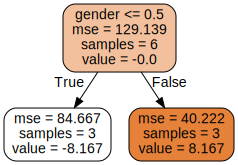

In [44]:
iterate(0)

In Iteration 0, we first train a tree using residuals_0. This tree tells us that males are higher than females, each male should add 8.167 kg, each female subtracts 8.167 kg. The result of the tree is $\gamma$ here. But, we want to take just a small step a time, so we multiply the learning rate $\alpha=0.2$. Thus, the new prediction is $prediction=prediction+\alpha\gamma$. That is to say, for each male, he will add $8.167*0.2=1.6334$ kg. For each female, she will lose $-8.167*0.2=-1.6334$ kg. Finally, the males are predicted 72.8 kg and females 69.5. 

,name,height,gender,weight,$f_1$,$r_1$,$\gamma_2$,$f_2$,$r_2$
0,Alex,1.6,male,88,72.800000,15.200000,7.288889,74.257778,13.742222
1,Brunei,1.6,female,76,69.533333,6.466667,7.288889,70.991111,5.008889
2,Candy,1.5,female,56,69.533333,-13.533333,-7.288889,68.075556,-12.075556
3,David,1.8,male,73,72.800000,0.200000,7.288889,74.257778,-1.257778
4,Eric,1.5,male,77,72.800000,4.200000,-7.288889,71.342222,5.657778
5,Felicity,1.4,female,57,69.533333,-12.533333,-7.288889,68.075556,-11.075556


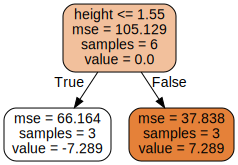

In [45]:
iterate(1)

In iteration 1, we firstly train a tree using residuals_1. This tree tells us height is also important in determining weight. Whose who are less than 1.55 meters are supported to lose -7.289 and the other to gain 7.289. Again, we want to shrink this to 20%, which is -1.4578 and 1.4578. We then make prediction_2 based on prediction_1 and $\gamma$. We see Alex gains 1.4578 kg because he is 1.6. Others also gain or lose weight because of the new rule.

,name,height,gender,weight,$f_2$,$r_2$,$\gamma_3$,$f_3$,$r_3$
0,Alex,1.6,male,88,74.257778,13.742222,6.047407,75.467259,12.532741
1,Brunei,1.6,female,76,70.991111,5.008889,-6.047407,69.781630,6.218370
2,Candy,1.5,female,56,68.075556,-12.075556,-6.047407,66.866074,-10.866074
3,David,1.8,male,73,74.257778,-1.257778,6.047407,75.467259,-2.467259
4,Eric,1.5,male,77,71.342222,5.657778,6.047407,72.551704,4.448296
5,Felicity,1.4,female,57,68.075556,-11.075556,-6.047407,66.866074,-9.866074


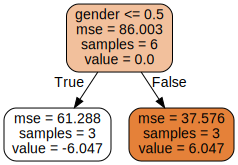

In [46]:
iterate(2)

Iteration 2 again tells us that gender matters.

,name,height,gender,weight,$f_3$,$r_3$,$\gamma_4$,$f_4$,$r_4$
0,Alex,1.6,male,88,75.467259,12.532741,5.427951,76.552849,11.447151
1,Brunei,1.6,female,76,69.781630,6.218370,5.427951,70.867220,5.132780
2,Candy,1.5,female,56,66.866074,-10.866074,-5.427951,65.780484,-9.780484
3,David,1.8,male,73,75.467259,-2.467259,5.427951,76.552849,-3.552849
4,Eric,1.5,male,77,72.551704,4.448296,-5.427951,71.466114,5.533886
5,Felicity,1.4,female,57,66.866074,-9.866074,-5.427951,65.780484,-8.780484


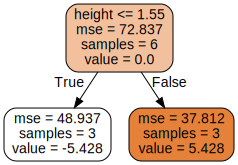

In [47]:
iterate(3)

Iteration 3 argues that height is important, too.

,name,height,gender,weight,$f_4$,$r_4$,$\gamma_5$,$f_5$,$r_5$
0,Alex,1.6,male,88,76.552849,11.447151,4.476063,77.448062,10.551938
1,Brunei,1.6,female,76,70.867220,5.132780,-4.476063,69.972007,6.027993
2,Candy,1.5,female,56,65.780484,-9.780484,-4.476063,64.885271,-8.885271
3,David,1.8,male,73,76.552849,-3.552849,4.476063,77.448062,-4.448062
4,Eric,1.5,male,77,71.466114,5.533886,4.476063,72.361326,4.638674
5,Felicity,1.4,female,57,65.780484,-8.780484,-4.476063,64.885271,-7.885271


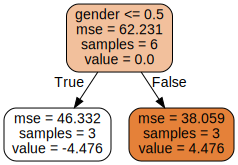

In [48]:
iterate(4)

Let's stop at Iteration 4. And take a look at the loss.

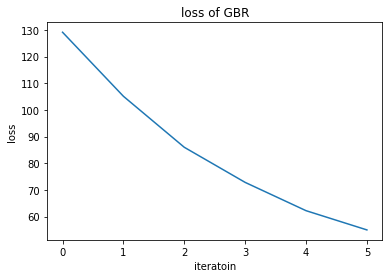

In [49]:
plt.plot(loss)
plt.title('loss of GBR')
plt.xlabel('iteratoin')
plt.ylabel('loss')
plt.show()

Hope you get the idea.

# Reference:

https://en.wikipedia.org/wiki/Gradient_boosting

https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=44    

https://www.youtube.com/watch?v=2xudPOBz-vs&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=45

This article is based on this video.